# Damped and driven pendulum

Based on https://physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html#numerical-integration

simple example of ode solving using python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# function to be solved
def f(y, t, params):
    theta, omega = y      # unpack current values of y
    Q, d, Omega = params  # unpack parameters
    derivs = [omega,      # list of dy/dt=f functions
             -omega/Q + np.sin(theta) + d*np.cos(Omega*t)]
    return derivs

In [3]:
# plot functions
def plot_theta(t, psoln):  
    
    # Plot theta as a function of time
    fig = plt.figure(1, figsize=(8,8))
    ax1 = fig.add_subplot(311)
    ax1.plot(t, psoln[:,0])
    ax1.set_xlabel('time')
    ax1.set_ylabel('theta')
    
    plt.tight_layout()
    plt.show()

    
def plot_omega(t, psoln):
    # Plot omega as a function of time
    fig = plt.figure(1, figsize=(8,8))
    ax2 = fig.add_subplot(312)
    ax2.plot(t, psoln[:,1])
    ax2.set_xlabel('time')
    ax2.set_ylabel('omega')
    
    plt.tight_layout()
    plt.show()

    
def plot_omega_theta(psoln):
    # Plot omega vs theta
    fig = plt.figure(1, figsize=(8,8))
    ax3 = fig.add_subplot(313)
    twopi = 2.0*np.pi
    ax3.plot(psoln[:,0]%twopi, psoln[:,1], '.', ms=1)
    ax3.set_xlabel('theta')
    ax3.set_ylabel('omega')
    ax3.set_xlim(0., twopi)

    plt.tight_layout()
    plt.show()

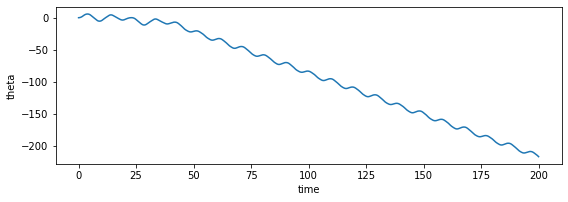

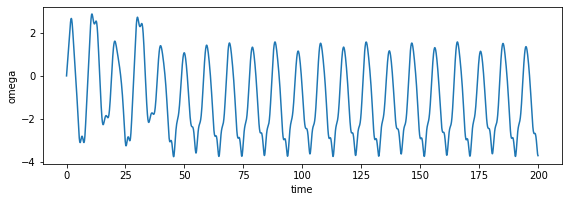

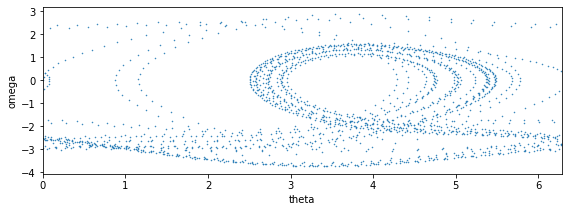

In [4]:
# A single example pendulum

# Parameters
Q = 5.0          # quality factor (inverse damping)
d = 1.5          # forcing amplitude
Omega = 0.65     # drive frequency

# Initial values
theta0 = 0.0     # initial angular displacement
omega0 = 0.0     # initial angular velocity

# Bundle parameters for ODE solver
params = [Q, d, Omega]

# Bundle initial conditions for ODE solver
y0 = [theta0, omega0]

# Make time array for solution
tStop = 200.
tInc = 0.1
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

plot_theta(t, psoln)
plot_omega(t, psoln)
plot_omega_theta(psoln)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\anaconda\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


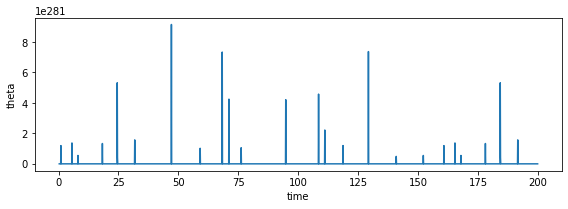

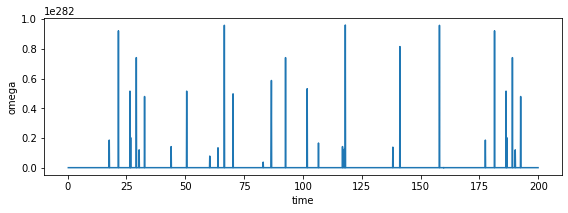

C:\anaconda\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in remainder


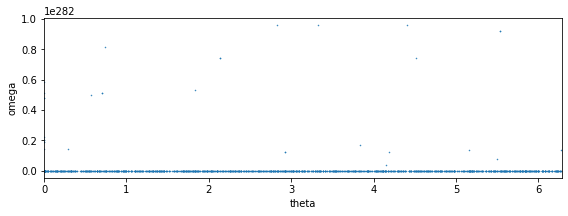

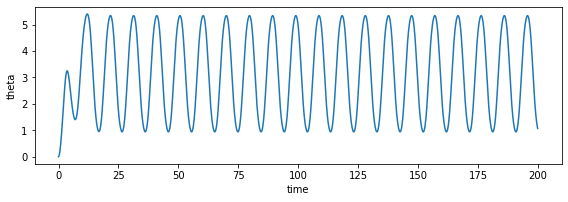

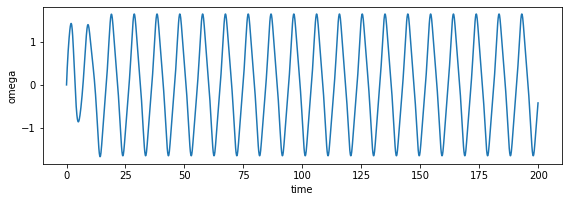

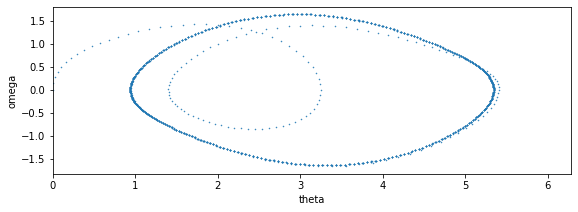

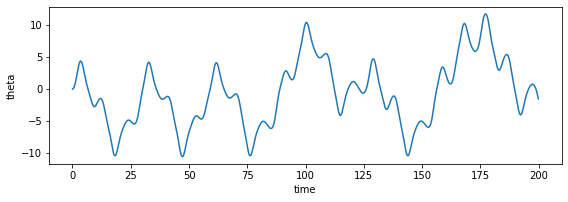

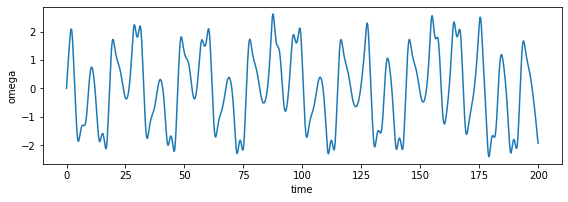

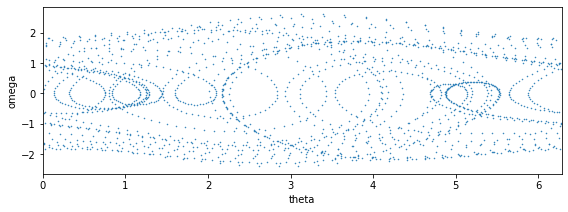

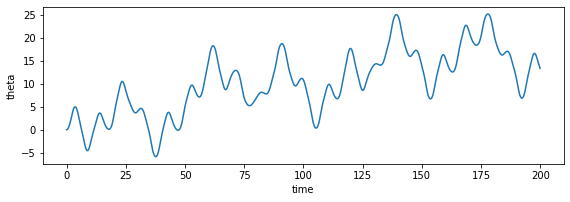

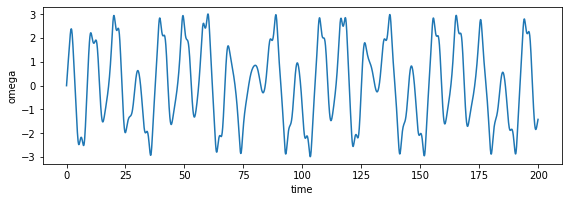

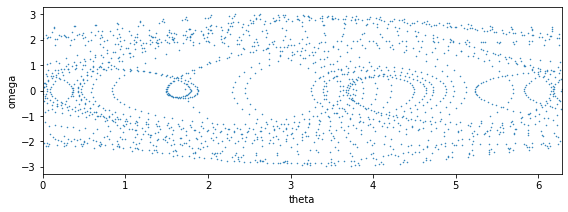

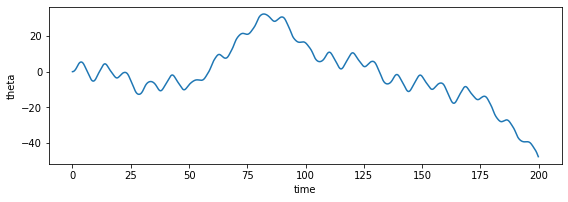

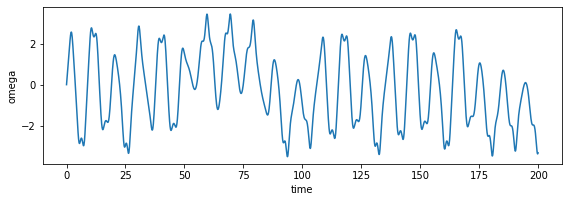

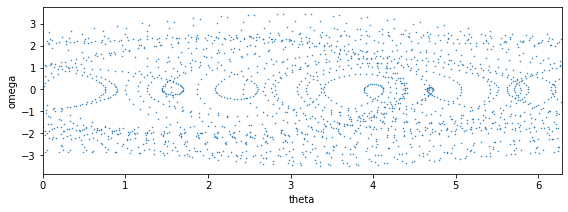

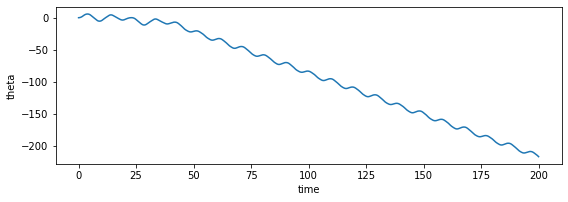

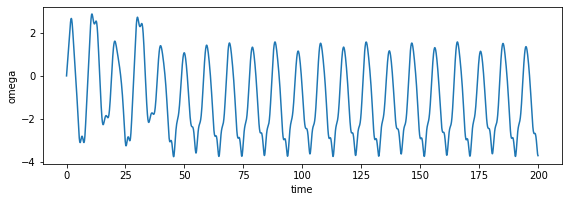

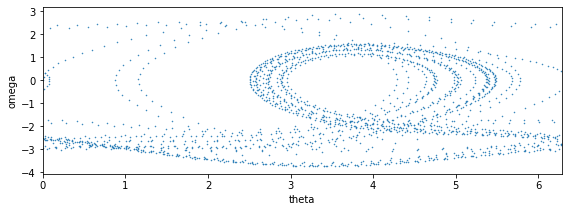

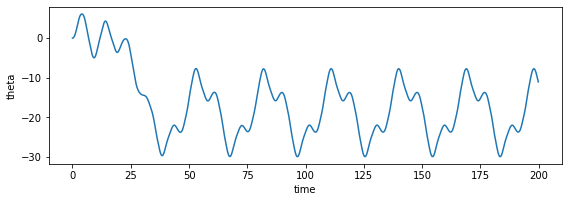

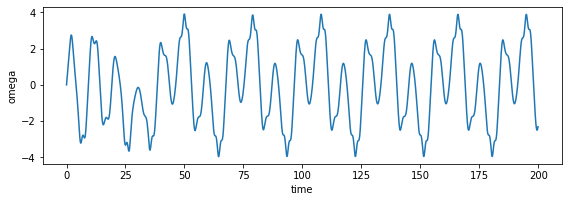

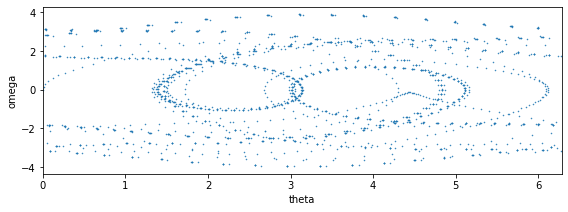

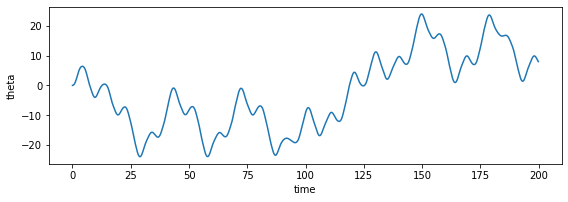

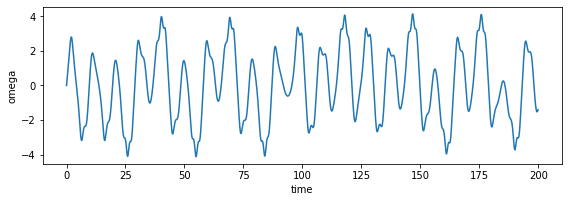

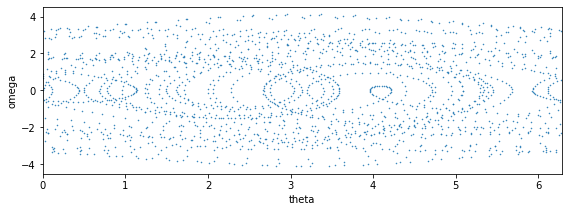

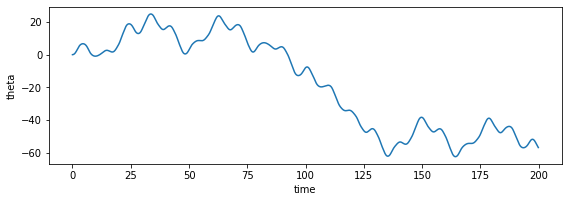

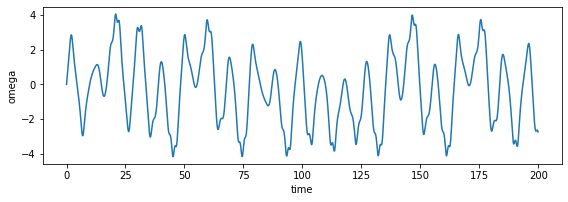

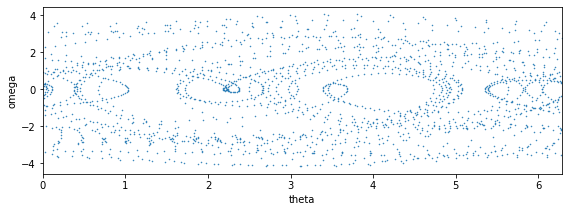

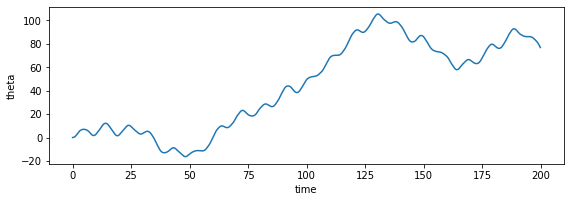

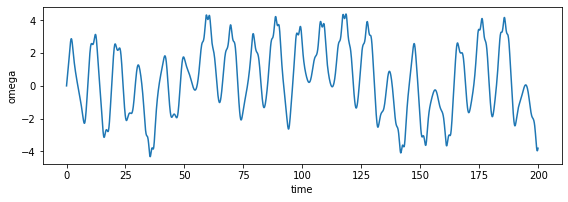

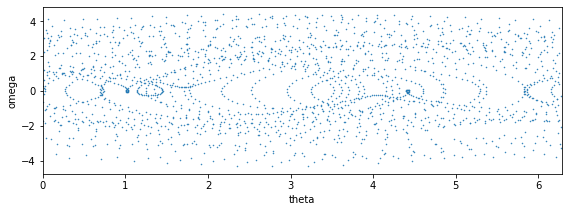

In [5]:
# Parameters
Q = np.arange(0, 10, 1)          # quality factor (inverse damping)
d = 1.5          # forcing amplitude
Omega = 0.65     # drive frequency

for q in Q:
    # Bundle parameters for ODE solver
    params = [q, d, Omega]

    # Call the ODE solver
    psoln = odeint(f, y0, t, args=(params,))

    plot_theta(t, psoln)
    plot_omega(t, psoln)
    plot_omega_theta(psoln)